In [97]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from sklearn import datasets    # import our handwriting dataset
from sklearn.neighbors import KNeighborsClassifier
from binaryImageConvert import binaryConvert

In [98]:
%%time
mnist = datasets.fetch_openml('mnist_784')

CPU times: user 18.7 s, sys: 123 ms, total: 18.8 s
Wall time: 18.9 s


In [99]:
%%time

"""comment cell out if not converting to binary"""
# convert all of mnist dataset to binary
for i in range(0, 70000):
    binaryConvert(mnist.data[i])

6479591836735
19.575255102040817
32.40816326530612
56.348214285714285
40.599489795918366
30.503826530612244
36.01275510204081
30.54719387755102
38.64923469387755
41.735969387755105
19.933673469387756
48.09566326530612
38.75255102040816
28.285714285714285
28.772959183673468
38.23852040816327
34.316326530612244
43.21811224489796
22.987244897959183
48.80229591836735
36.38520408163265
35.952806122448976
43.109693877551024
44.232142857142854
34.89795918367347
45.422193877551024
21.70280612244898
39.172193877551024
44.37372448979592
34.9030612244898
35.22704081632653
38.42857142857143
39.99107142857143
33.514030612244895
18.191326530612244
31.817602040816325
30.466836734693878
33.75637755102041
38.264030612244895
44.08163265306123
37.32015306122449
30.96811224489796
41.64795918367347
31.410714285714285
17.07908163265306
35.22704081632653
40.83673469387755
50.36862244897959
30.674744897959183
30.815051020408163
36.05229591836735
36.880102040816325
26.46811224489796
39.14923469387755
45.132653

In [100]:
X = mnist['data']
print(X.shape)
y = mnist['target']
print(y.shape)

(70000, 784)
(70000,)


In [101]:
"""for time sake, change number of images. else, comment out"""
X = X[:3000]
y = y[:3000]
print(X.shape)
print(y.shape)

(3000, 784)
(3000,)


In [102]:
mnist.data[0] # view array of first image, each number represents intensity
# print(mnist.data[0].shape)

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

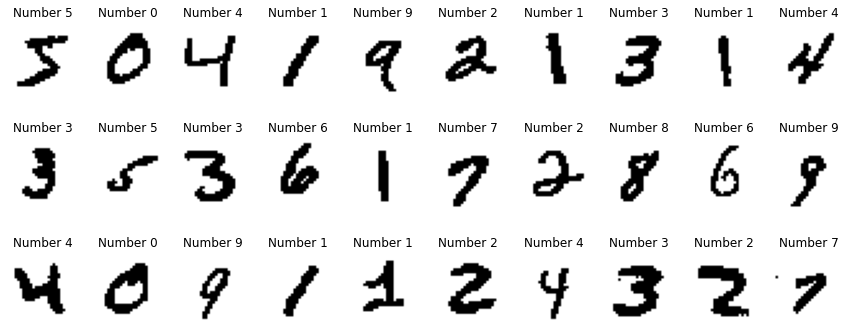

In [103]:
# plot samples

fig, ax = plt.subplots(3, 10, figsize=(15,6))
for ax, img, num in zip(ax.ravel(), X, y):
    ax.axis('off')
    ax.imshow(np.reshape(img, (28,28)), cmap = plt.cm.gray_r)
    ax.set_title('Number ' + str(num))

In [104]:
# split data into training and testing

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.142857, random_state=99, stratify=y)   # split test size into ratio similar to original MNIST dataset (60k train, 10k test)

In [105]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2571, 784)
(429, 784)
(2571,)
(429,)


In [106]:
from sklearn.metrics import classification_report
from sklearn import metrics

acc_results = []
k_values = []

def calculation(n):
    # fit model
    knn = KNeighborsClassifier(n_neighbors=n)   # can change neighbors to see accuracy change
    knn.fit(X_train, y_train)

    # predict from test dataset
    y_pred = knn.predict(X_test)
    y_pred

    acc = metrics.balanced_accuracy_score(y_test, y_pred)   # we use balanced accuracy here instead of just accuracy because we want a better measure-- assume number of samples for each target is the same
    acc_results.append(acc)
    k_values.append(n)

In [107]:
%%time
calculation(1)

CPU times: user 1.39 s, sys: 23.1 ms, total: 1.41 s
Wall time: 1.42 s


In [108]:
%%time
calculation(5)

CPU times: user 1.38 s, sys: 3.21 ms, total: 1.39 s
Wall time: 1.4 s


In [109]:
%%time
calculation(9)

CPU times: user 1.42 s, sys: 0 ns, total: 1.42 s
Wall time: 1.42 s


In [110]:
%%time
calculation(13)

CPU times: user 1.42 s, sys: 3.21 ms, total: 1.43 s
Wall time: 1.43 s


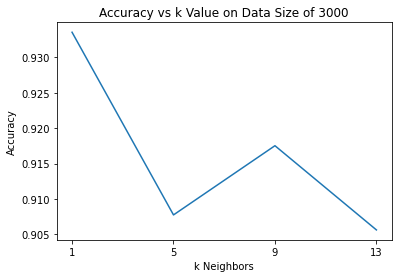

[1, 5, 9, 13] [0.9335591365977922, 0.9077434571112489, 0.9175240922201446, 0.9056236653803852]


In [111]:
from matplotlib.ticker import FormatStrFormatter

fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))

plt.plot(k_values, acc_results)
plt.ylabel('Accuracy')
plt.xlabel('k Neighbors')
plt.xticks(k_values)
plt.title('Accuracy vs k Value on Data Size of 3000')
plt.show()

print(k_values, acc_results)

In [112]:
"""grayscale"""
# 3k data size results: [1, 5, 9, 13] [0.9200963561994208, 0.9002956516455214, 0.9095111410069912, 0.9022352867799175] CPU times: user 5.66 s, sys: 3.25 ms, total: 5.66 s Wall time: 5.69 s
# 35k data size results: [1, 5, 9, 13] [0.9704856620221142, 0.9680528133823139, 0.9644114719745545, 0.9609617302588882] CPU times: user 10min 39s, sys: 1.85 s, total: 10min 40s Wall time: 10min 45s
# 70k data size results: [1, 5, 9, 13] [0.9722460996843761, 0.9737679345043265, 0.9699328982006934, 0.9686179441347] CPU times: user 41min 57s, sys: 4.55 s, total: 42min 1s

"""binary"""
# CPU times: user 45.1 s, sys: 2.13 s, total: 47.2 s
# Wall time: 45.6 s

# 3k data size results: [1, 5, 9, 13] [0.9335591365977922, 0.9077434571112489, 0.9175240922201446, 0.9056236653803852] CPU times: user 5.56 s, sys: 0 ns, total: 5.56 s Wall time: 5.59 s
# 35k data size results: 
# 70k data size results: 



'binary'

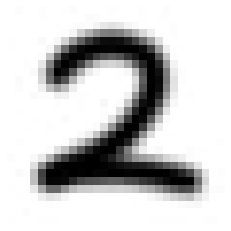

In [113]:
# test model on image not in dataset

def rgb2gray(rgb):  # function for converting to grayscale
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

# feed and plot image
imgfile = 'number_28x28.jpg'
im = mpimg.imread(imgfile)
im = rgb2gray(im)
im = im/255
im=(784-im*784).astype(int)
plt.imshow(im, cmap = plt.cm.gray_r)
plt.axis('off')
plt.show()

In [116]:
im = im.reshape(1,-1)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
guess = knn.predict(im)

print('The predicted number of the image [' + str(imgfile) + "] is " + str(guess) + ".")

The predicted number of the image [number_28x28.jpg] is ['2'].
